In [5]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.checkpoint.memory import InMemorySaver
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.messages.utils import trim_messages, count_tokens_approximately

In [2]:
load_dotenv()

True

In [3]:
llm = ChatOpenAI()

In [4]:
MAX_TOKENS = 150

In [6]:
def call_model(state: MessagesState):
    # Trim conversation history to return last N messages that don't exceed MAX_TOKENS
    messages = trim_messages(
        state['messages'],
        strategy="last",
        token_counter=count_tokens_approximately,
        max_tokens=MAX_TOKENS
    )
    
    print('Current Token Count:', count_tokens_approximately(messages=messages))
    
    for message in messages:
        print(message.content)
        
    response = llm.invoke(messages)
    return {'messages': [response]}

In [7]:
# Define the state graph
graph = StateGraph(MessagesState)
graph.add_node('call_model', call_model)
graph.add_edge(START, 'call_model')

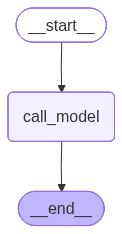

In [8]:
# Define checkpointer
checkpointer = InMemorySaver()

# Compile the graph
workflow = graph.compile(checkpointer=checkpointer)
workflow

In [9]:
config = {'configurable': {'thread_id': 'thread-1'}}

result = workflow.invoke(
    {
        'messages': [
            ('user', 'Hi, my name is Sayam.')
        ],
    },
    config=config
)
print(result['messages'][-1].content)

Current Token Count: 10
Hi, my name is Sayam.
Hello Sayam, nice to meet you. How can I assist you today?


In [11]:
result = workflow.invoke({"messages": [{"role": "user", "content": "What is my name?"}]}, config=config)
print(result['messages'][-1].content)

Current Token Count: 56
Hi, my name is Sayam.
Hello Sayam, nice to meet you. How can I assist you today?
What is my name?
Your name is Sayam.
What is my name?
Your name is Sayam.


In [12]:
result = workflow.invoke({"messages": [{"role": "user", "content": "I am learning short-term memory implementation in LangGraph."}]}, config=config)
print(result['messages'][-1].content)

Current Token Count: 85
Hi, my name is Sayam.
Hello Sayam, nice to meet you. How can I assist you today?
What is my name?
Your name is Sayam.
What is my name?
Your name is Sayam.
I am learning short-term memory implementation in LangGraph.
That's great to hear! LangGraph is a powerful tool for learning about language and memory concepts. If you have any questions or need help with anything related to short-term memory implementation in LangGraph, feel free to ask.


In [13]:
result = workflow.invoke({"messages": [{"role": "user", "content": "Explain how to get the optimal weights and biases for a given dataset using gradient descent."}]}, config=config)
print(result['messages'][-1].content)

Current Token Count: 146
What is my name?
Your name is Sayam.
What is my name?
Your name is Sayam.
I am learning short-term memory implementation in LangGraph.
That's great to hear! LangGraph is a powerful tool for learning about language and memory concepts. If you have any questions or need help with anything related to short-term memory implementation in LangGraph, feel free to ask.
Explain how to get the optimal weights and biases for a given dataset using gradient descent.
Gradient descent is an iterative optimization algorithm used to find the optimal weights and biases for a neural network model given a dataset. Here's a general overview of the steps involved in using gradient descent to update the weights and biases:

1. Initialization: Initialize the weights and biases of the neural network with random values.

2. Forward Propagation: Perform forward propagation to compute the output of the neural network for a given input.

3. Calculate Loss: Compute the loss or error between

In [14]:
result = workflow.invoke({"messages": [{"role": "user", "content": "What is my name?"}]}, config=config)
print(result['messages'][-1].content)

Current Token Count: 8
What is my name?
I'm sorry, I do not know your name as we are communicating through text.


In [15]:
for item in workflow.get_state({"configurable": {"thread_id": "thread-1"}}).values['messages']:
    print(item.content)
    print('---'*40)

Hi, my name is Sayam.
------------------------------------------------------------------------------------------------------------------------
Hello Sayam, nice to meet you. How can I assist you today?
------------------------------------------------------------------------------------------------------------------------
What is my name?
------------------------------------------------------------------------------------------------------------------------
Your name is Sayam.
------------------------------------------------------------------------------------------------------------------------
What is my name?
------------------------------------------------------------------------------------------------------------------------
Your name is Sayam.
------------------------------------------------------------------------------------------------------------------------
I am learning short-term memory implementation in LangGraph.
----------------------------------------------------------